# Analyse d'une base de données de crédit bancaire

## Présentation de la base de données

__Le jeu de données contient 1000 entrées avec 20 variables. Dans cet ensemble de données, chaque entrée représente un individu qui prend un crédit auprès d'une banque.__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fanalysis.mca import MCA

## Partie 1 : ACM

Dans cette partie, nous analysons les variables qualitatives :
   
* Sex : sexe  (homme, femme)
* Job : emploi (non qualifié et non résident, non qualifié et résident, qualifié, hautement qualifié)
* Housing : logement (propriété (own), location (rent), ou gratuit (free))
* Saving accounts : comptes d'épargne (peu (little), moyen (moderate), assez riche (quite rich), riche (rich))
* Checking account : compte de chèques (peu (little), moyen (moderate), riche (rich))
* Purpose: but (voiture, meubles/équipement, radio/TV, appareils ménagers, réparations, éducation, affaires, vacances/autres)

In [2]:
# Import des données, et j'ai changé l'individus data_acm à df1
df1 = pd.read_csv('data2_acm.csv').iloc[:,1:]
df1

Sex                     Job Housing Saving accounts Checking account  \
0      male                 skilled     own          little           little   
1    female                 skilled     own          little         moderate   
2      male  unskilled and resident     own          little           little   
3      male                 skilled    free          little           little   
4      male                 skilled    free          little           little   
..      ...                     ...     ...             ...              ...   
995  female  unskilled and resident     own          little           little   
996    male          highly skilled     own          little           little   
997    male                 skilled     own          little           little   
998    male                 skilled    free          little           little   
999    male                 skilled     own        moderate         moderate   

                 Purpose  
0               radio/TV  
1               radio/TV  
2              education  
3    furniture/equipment  
4                    car  
..                   ...  
995  furniture/equipment  
996                  car  
997             radio/TV  
998             radio/TV  
999                  car  

[1000 rows x 6 columns]

__Analyse ACM__

* Effectuer une ACM sur le jeu de données. Justifier le nombre de composantes retournées par l'ACM.
* Afficher les valeurs propres et les ratios de variance expliquée par chaque composante. 
* Quel serait le nombre de facteurs à retenir ? (en se basant sur la technique qui permet de garder les dimensions dont les valeurs propres sont supérieures à la moyenne des valeurs propres) justifier la réponse.
* Effectuer l'ACM en gardant uniquement 3 facteurs. 
* Afficher les coordonnées, les contributions et les qualités de représentation des points lignes sur  chaque axe. 
* Tracer le graphique des points lignes sur les deux premières composantes et interpréter le résultats.
* Afficher les coordonnées, les contributions et les qualités de représentation des points colonnes sur chaque axe.
* Tracer le graphique des points colonnes sur les deux premières composantes et interpréter le résultats.
* Est-il intéressant de tracer les graphiques (points lignes et points colonnes) sur les autres dimensions ?  Effectuer la démarche le cas échéant, et analyser.

In [3]:
#1
X = df1.values
my_mca = MCA(row_labels=df1.index.values, var_labels=df1.columns.values)
my_mca.fit(X)

MCA(row_labels=array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 10...
       936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948,
       949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961,
       962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974,
       975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987,
       988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]),
    var_labels

[[  0.24358872   0.21724607   0.2094151    0.19173625   0.18176486
    0.17901946   0.17541902   0.17101251   0.17036713   0.16310704
    0.16049166   0.15705062   0.14986697   0.1363728    0.13474162
    0.12729569   0.11739429   0.11411018]
 [  8.11962384   7.24153563   6.98050339   6.39120824   6.05882875
    5.96731532   5.84730062   5.70041684   5.67890427   5.43690138
    5.34972206   5.2350208    4.99556578   4.54576008   4.49138738
    4.24318973   3.91314312   3.80367276]
 [  8.11962384  15.36115947  22.34166286  28.7328711   34.79169985
   40.75901518  46.6063158   52.30673264  57.98563691  63.42253829
   68.77226035  74.00728115  79.00284693  83.54860701  88.0399944
   92.28318413  96.19632724 100.        ]]


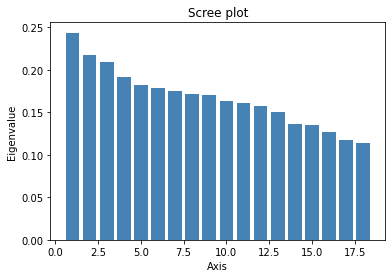

In [4]:
#2
#On peut utiliser le code my_mca.eig_ pour les valeurs propres pour chaque composantes
#la première ligne c'est les valeurs propres absolue
#la deuxième ligne c'est les ratios de variance
#la trosième ligne c'est les pourcentage cumulé de la variance totale
print(my_mca.eig_)
#On peut aussi afficher les valeurs propres sur un figure
my_mca.plot_eigenvalues()
#On peut aussi afficher les valeurs propres sur un figure

In [5]:
#3
Moyenne_vp=np.average(my_mca.eig_[0])
print(Moyenne_vp)
#On peut voir que la moyenne des valeurs propres est égale à 1/6, ou 0,1666666 
#Ici j'ai d'un problème, quand j'ai fait 'Run Cell', j'ai d'un résultats mais pas 1/6.Mais c'est pas très grave.
#Donc on peut choisir 9 components

0.16666666666666666


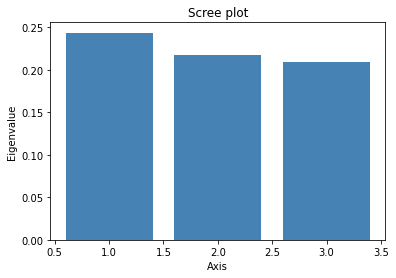

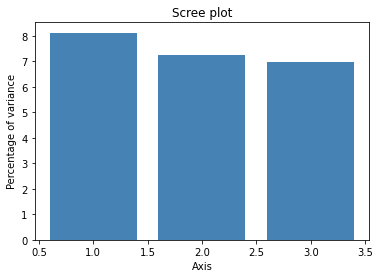

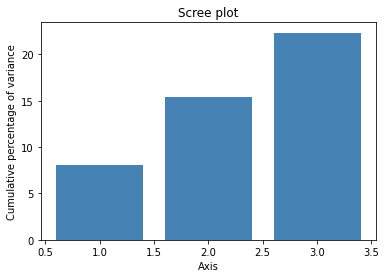

In [6]:
#4
my_mca = MCA(row_labels=df1.index.values, var_labels=df1.columns.values[0:6],n_components=3)
my_mca.fit(X)
my_mca.plot_eigenvalues()
my_mca.plot_eigenvalues(type="percentage")
my_mca.plot_eigenvalues(type="cumulative")

In [7]:
#5
df1_rows = my_mca.row_topandas()
# Coordonnées des points lignes on peut utiliser code(my_mca.row_coord_)
# Contributions des points lignes on peut utiliser code(my_mca.row_contrib_)
# Cos2 des points lignes on peut utiliser code(my_mca.row_cos2_)
print(df1_rows)
print(my_mca.row_coord_)
print(my_mca.row_contrib_)
print(my_mca.row_cos2_)

     row_coord_dim1  row_coord_dim2  row_coord_dim3  row_contrib_dim1  \
0          0.183871        0.423088       -0.505150          0.013879   
1          0.297869        0.225395        0.295775          0.036425   
2         -0.065761       -0.017523       -0.200320          0.001775   
3         -0.254783       -0.496382       -0.565524          0.026649   
4         -0.662187       -0.395175       -0.588403          0.180013   
..              ...             ...             ...               ...   
995        0.589786       -0.322032        0.090984          0.142801   
996       -0.679321       -0.152973       -0.367460          0.189449   
997        0.183871        0.423088       -0.505150          0.013879   
998       -0.382939       -0.029569       -0.673814          0.060201   
999       -0.373980        0.538951        0.676619          0.057417   

     row_contrib_dim2  row_contrib_dim3  row_cos2_dim1  row_cos2_dim2  \
0            0.082397          0.121852       0.04

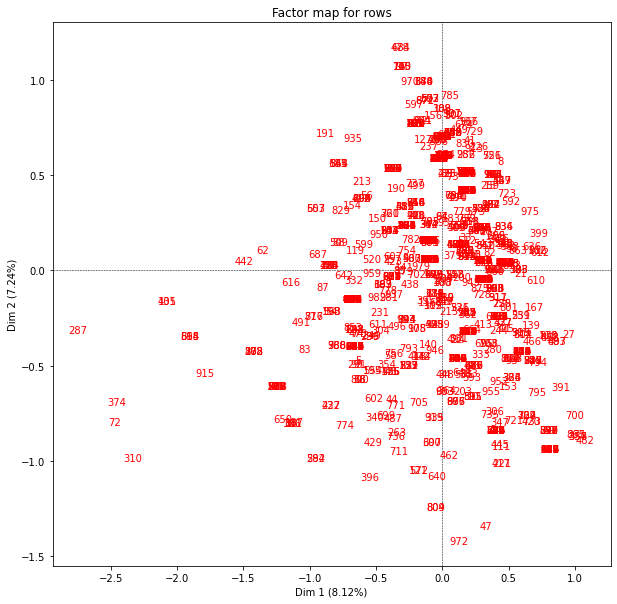

In [8]:
#6
my_mca.mapping_row(num_x_axis=1, num_y_axis=2,figsize=(10,10))

[[ 0.58985009 -0.72884574  0.55736191]
 [-0.26500511  0.32745243 -0.25040897]
 [-1.44882549 -0.5212323  -0.01447943]
 [ 0.28039823  0.06732561 -0.15802427]
 [-0.53809837 -1.56069392  1.22548247]
 [ 0.24806727  0.34531257  0.37368816]
 [-1.60882338 -0.8699674  -0.57406072]
 [ 0.06966025  0.39592652 -0.1109588 ]
 [ 0.69321321 -1.05217393  0.78833621]
 [-0.04292723 -0.10751036 -0.16139247]
 [-0.35067606  0.73552132  1.45755424]
 [ 0.5435017   0.11489836 -0.88199906]
 [ 0.74207979  0.03137181  0.67275693]
 [ 0.13891144 -0.15100613 -0.37038113]
 [-0.37836188  0.35242586  1.0209589 ]
 [ 0.14264291  0.09634188 -0.43211667]
 [-0.26096158  1.11958018  1.04510216]
 [-0.46347535 -0.37143275 -0.10131834]
 [ 1.3599905  -0.4546494  -0.37521683]
 [-0.34344418 -0.8591793  -0.03056824]
 [ 0.7429619  -0.65446527 -0.0385006 ]
 [ 0.36345595  0.65101259 -0.33583214]
 [-0.08044503  0.89609928  1.08777465]
 [-4.08551587 -0.90154719  1.34550527]]
[[7.37966394e+00 1.26336766e+01 7.66437970e+00]
 [3.31550119e+0

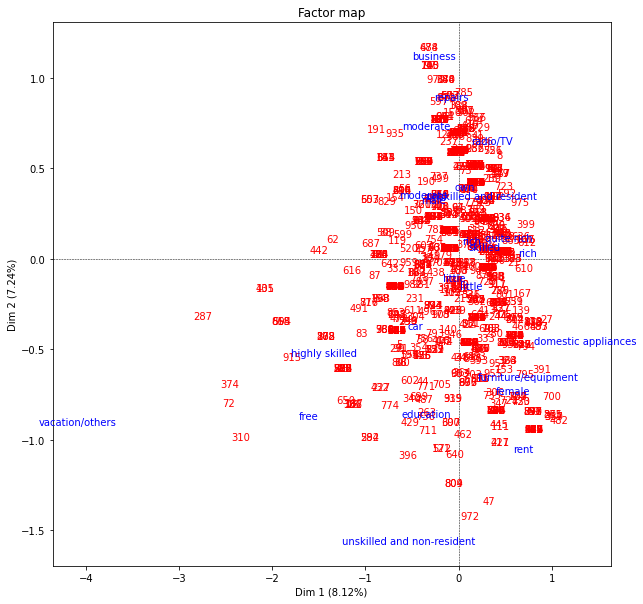

In [9]:
#7 #8
#Ici les deux exercises c'est la même méthode de exercise 5 et 6,
df_cols = my_mca.col_topandas()
print(my_mca.col_coord_)
print(my_mca.col_contrib_)
print(my_mca.col_cos2_)
my_mca.mapping(num_x_axis=1, num_y_axis=2,figsize=(10,10))

In [10]:
#Non, car la contribution des deux dimensions n'est pas beaucoup donc c'est pas possible qu'on fait juste 2 dimensions.


## Partie 2 : ACP et Clustering

Dans cette partie, nous utilisons toutes les variables, à savoir les variables quantitatives ainsi que les variables catégorielles (qualitatives) transformées en variable quantitatives :

* Age : age (numérique)
* Sex_cat : sexe (1 pour homme, 0 pour femme)
* Job_cat : emploi (0 - non qualifié et non résident, 1 - non qualifié et résident, 2 - qualifié, 3 - hautement qualifié)
* Housing_cat : logement (0 : gratuit (free), 1 : propriété (own), 2 : location (rent) )
* Saving accounts_cat : comptes d'épargne (0 : peu (little), 1 : moyen (moderate), 2 : assez riche (quite rich), 3 : riche (rich))
* Checking account_cat : compte de chèques (0 : peu (little),  1 : moyen (moderate), 2 : riche (rich))
* Credit amount : montant du crédit (numérique)
* Duration : durée (numérique, en mois)
* Purpose_cat : but (0 : Business (affaires), 1 : car (voiture) ,2 : domestic appliances (appareils ménagers), 3 :  education (éducation), 4 : furniture/equipment (meubles/équipement), 5 : radio/TV, 6 : repairs (réparations), 7 : vacation/others (vacances/autres)).

In [11]:
# Import des données, j'ai changé la incertitude data_inclus à df2
df2 = pd.read_csv('data2_clustering.csv').iloc[:,1:]
df2

Age  Credit amount  Duration  Sex_cat  Job_cat  Housing_cat  Purpose_cat  \
0     67           1169         6        1        2            1            5   
1     22           5951        48        0        2            1            5   
2     49           2096        12        1        1            1            3   
3     45           7882        42        1        2            0            4   
4     53           4870        24        1        2            0            1   
..   ...            ...       ...      ...      ...          ...          ...   
995   31           1736        12        0        1            1            4   
996   40           3857        30        1        3            1            1   
997   38            804        12        1        2            1            5   
998   23           1845        45        1        2            0            5   
999   27           4576        45        1        2            1            1   

     Saving accounts_cat  Checking account_cat  
0                      0                     0  
1                      0                     1  
2                      0                     0  
3                      0                     0  
4                      0                     0  
..                   ...                   ...  
995                    0                     0  
996                    0                     0  
997                    0                     0  
998                    0                     0  
999                    1                     1  

[1000 rows x 9 columns]

## Enoncé

__1. Présenter une synthèse des données.__

__2. Analyse ACP:__
   - Effectuer une analyse ACP avec deux dimensions, tracer le graphique correspondant et analyser. 
   - Quelle quantité d'information est préservée dans ce cas ?
   - Utiliser la métrique éboulis des valeurs propres (scree plot), que suggère cette métrique par rapport au nombre de dimensions à garder ? (justifier le raisonnement).
   
 __Dans la suite, nous gardons uniquement les deux premières dimensions :__
 
   - Calculer les contributions et les qualités de représentation des individus et des variables par rapport à chacun des facteurs, et analyser.
   - Calculer les corrélations des variables avec chacun des axes, tracer le cercle des corrélations et analyser.
   
__3. Classification__
   - Effectuer une classification Ascendente Hierarchique : tracer le dendrogramme, utiliser le tracé pour determiner le nombre de classe à retenir (justifier le raisonnement).
   - Effectuer une classification K-means en utilisant le nombre de classe retenue avec la CAH. 
   - Comparer les classes obtenues avec la CAH et les classes obtenues par K-means, analyser.
   - Etudier les classes obtenues par K-means, analyser les propriétés des individus qui composent chacune des classes : sexe, catégorie d'emploie, but du crédit, etc.
   

In [12]:
#1
df2.describe()

Age  Credit amount     Duration      Sex_cat      Job_cat  \
count  1000.000000    1000.000000  1000.000000  1000.000000  1000.000000   
mean     35.546000    3271.258000    20.903000     0.690000     1.904000   
std      11.375469    2822.736876    12.058814     0.462725     0.653614   
min      19.000000     250.000000     4.000000     0.000000     0.000000   
25%      27.000000    1365.500000    12.000000     0.000000     2.000000   
50%      33.000000    2319.500000    18.000000     1.000000     2.000000   
75%      42.000000    3972.250000    24.000000     1.000000     2.000000   
max      75.000000   18424.000000    72.000000     1.000000     3.000000   

       Housing_cat  Purpose_cat  Saving accounts_cat  Checking account_cat  
count  1000.000000  1000.000000          1000.000000           1000.000000  
mean      1.071000     2.878000             0.373000              0.395000  
std       0.531264     1.978138             0.805307              0.604434  
min       0.000000     0.000000             0.000000              0.000000  
25%       1.000000     1.000000             0.000000              0.000000  
50%       1.000000     3.000000             0.000000              0.000000  
75%       1.000000     5.000000             0.000000              1.000000  
max       2.000000     7.000000             3.000000              2.000000

<AxesSubplot:xlabel='Axe principal 1', ylabel='Axe principal 2'>

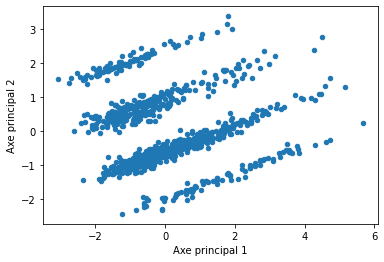

In [13]:
#2.1
x = df2.iloc[:,1:9].values
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)
from sklearn.decomposition import PCA as sklearnPCA
pca = sklearnPCA(n_components = 2)
principalComponents = pca.fit_transform(x)
principaldf = pd.DataFrame(data = principalComponents, columns = ['Axe principal 1', 'Axe principal 2'])
import matplotlib.pyplot as plt
principaldf.plot.scatter(x='Axe principal 1', y='Axe principal 2')
#On peut voir que il y a 4 nuages des données.

In [14]:
#2.2
#Je pense que c'est beaucoup des informations sont réservé dans ce cas.
#Il n'y a évidemment pas beaucoup de valeurs très rares dans les données.

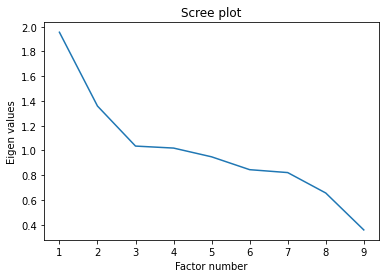

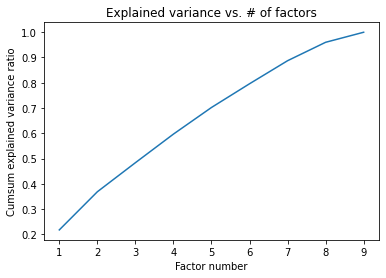

In [15]:
#2.3
sc = StandardScaler()
Z = sc.fit_transform(df2)
from sklearn.decomposition import PCA
acp = PCA(svd_solver='full')
coord = acp.fit_transform(Z)
n = (acp.n_components_)
variance = acp.explained_variance_
eigval = variance*(len(Z)-1)/len(Z)
plt.plot(np.arange(1,n+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()
plt.plot(np.arange(1,n+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()
#D'après les résultats je pense on peut réserver 2 dimensions à garder

In [16]:
#2.4
#C'est la formule de contribution des individus dans l'inertie totale
di = np.sum(Z**2,axis=1)
print(pd.DataFrame({'Num':df2.index,'d_i':di}))
#C'est la formule de contribution aux chaques axes
ctr = coord**2
for j in range(9):
     ctr[:,j] = ctr[:,j]/(9*eigval[j])
print(pd.DataFrame({'Num':df2.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))
#C'est la formule des qualités ou on peut dire Cos2 pour chaque axes
cos2 = coord**2
for j in range(9):
     cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'Num':df2.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

     Num        d_i
0      0  12.020264
1      1  12.010770
2      2   5.147410
3      3  11.929267
4      4   8.827178
..   ...        ...
995  995   6.124397
996  996   5.592424
997  997   3.639855
998  998  11.803439
999  999   7.776636

[1000 rows x 2 columns]
     Num     CTR_1     CTR_2
0      0  0.016310  0.534479
1      1  0.074788  0.449661
2      2  0.027686  0.205686
3      3  0.466782  0.048362
4      4  0.189343  0.329625
..   ...       ...       ...
995  995  0.155725  0.007165
996  996  0.152034  0.000850
997  997  0.032376  0.060694
998  998  0.104683  0.000270
999  999  0.142653  0.051154

[1000 rows x 3 columns]
     Num    COS2_1    COS2_2
0      0  0.023881  0.543978
1      1  0.109592  0.458014
2      2  0.094663  0.488854
3      3  0.688681  0.049597
4      4  0.377524  0.456838
..   ...       ...       ...
995  995  0.447521  0.014313
996  996  0.478475  0.001860
997  997  0.156553  0.203999
998  998  0.156094  0.000280
999  999  0.322855  0.080473

[1000 rows x 

                     id     COR_1     COR_2
0                   Age  0.228272  0.722663
1         Credit amount  0.808152 -0.317874
2              Duration  0.764135 -0.350636
3               Sex_cat  0.344629  0.493388
4               Job_cat  0.503086 -0.158458
5           Housing_cat -0.459100 -0.580443
6           Purpose_cat -0.255658 -0.048103
7   Saving accounts_cat -0.134636  0.070927
8  Checking account_cat -0.018293 -0.017060


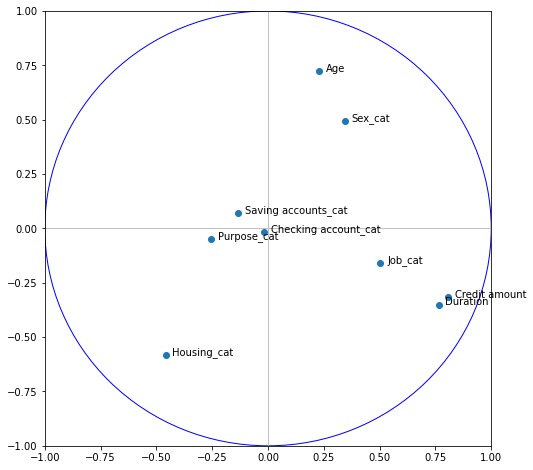

In [17]:
#2.5
sqrt_eigval = np.sqrt(eigval)
corvar = np.zeros((9,9))
for k in range(9):
     corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]
print(pd.DataFrame({'id':df2.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))
#C'est la corrélation des données
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
plt.scatter(corvar[:,0],corvar[:,1])
for j in range(9):
     plt.annotate(df2.columns[j],(corvar[j,0]+0.03,corvar[j,1]))
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
plt.show()
#C'est la cercle des corrélations des axe1 et axe2

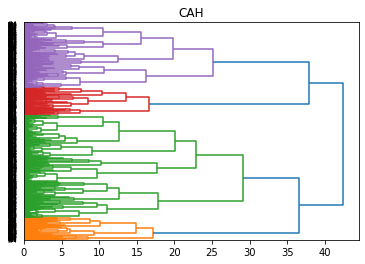

[2 1 2 2 2 2 3 1 3 2 4 1 4 2 4 4 2 1 2 3 2 3 4 2 2 2 2 3 2 1 3 2 2 4 4 2 2
 2 2 2 3 3 2 1 1 4 3 3 2 4 2 2 2 2 2 2 2 1 4 1 2 2 2 1 4 2 4 3 2 1 1 4 2 1
 2 2 2 2 1 2 1 3 4 4 2 4 4 1 2 2 2 2 4 4 3 1 4 2 2 1 4 4 4 4 4 1 2 2 1 3 2
 4 4 1 3 2 1 4 1 3 4 4 4 2 4 2 2 2 2 4 1 2 2 2 1 4 3 3 2 4 3 1 2 2 4 2 4 4
 2 3 2 2 2 3 1 4 3 2 2 2 3 4 3 2 3 3 4 3 4 2 4 4 4 2 2 1 2 3 4 2 1 2 2 3 2
 2 2 2 3 4 3 2 2 4 4 4 4 4 2 2 3 2 2 4 2 2 2 2 2 3 2 4 2 2 2 4 2 2 4 4 2 4
 2 2 2 2 1 2 2 2 2 3 3 2 2 2 2 4 4 2 4 2 2 4 3 2 2 4 2 4 3 4 4 3 2 2 2 2 4
 4 2 4 2 4 2 2 1 4 2 2 2 3 1 2 2 2 4 2 4 4 3 2 2 2 2 1 1 1 4 2 2 1 4 2 1 1
 4 2 2 3 4 4 2 2 1 3 4 3 4 4 2 3 4 2 2 2 2 4 2 4 2 2 2 3 4 2 4 3 2 2 2 4 1
 1 4 4 4 4 2 2 4 4 3 2 2 4 2 3 3 3 4 4 2 4 3 2 2 2 2 4 2 2 4 4 2 2 2 4 2 4
 1 2 4 1 1 1 2 2 1 4 2 2 4 2 3 4 4 2 3 4 2 3 2 4 2 1 4 2 4 3 2 2 1 2 2 2 2
 2 3 3 4 1 2 4 4 1 2 1 3 4 3 2 2 2 4 4 2 3 2 4 2 1 2 2 2 2 3 3 2 4 2 4 2 2
 1 4 1 2 4 3 1 4 2 2 2 4 4 2 4 2 2 2 4 2 2 2 4 2 1 2 3 4 2 2 2 4 3 2 2 2 4
 2 3 3 3 2 2 4 4 4 2 2 4 

In [18]:
#3.1 CAH
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
CAH = linkage(x,method='ward',metric='euclidean')
plt.title("CAH")
dendrogram(CAH,labels=df2.index,orientation='right',color_threshold=33)
plt.show()
#Comme les résultats ici, j'ai choisi 33 pour classification donc j'ai 4 classes.
#C'est la graphe de CAH avec matérialisation des 4 classes.
groupes_cah = fcluster(CAH,t=33,criterion='distance')
print(groupes_cah)
idg = np.argsort(groupes_cah)

In [19]:
#3.2 Kmeans
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=4)
kmeans.fit(x)
print(kmeans.labels_)
idk = np.argsort(kmeans.labels_)
print(pd.DataFrame(df2.index[idk],kmeans.labels_[idk]))

[2 1 2 1 1 1 0 1 0 1 3 1 3 2 3 3 2 1 1 0 2 0 2 2 2 2 2 0 2 1 0 2 2 2 3 1 1
 2 2 2 0 0 2 1 1 3 0 0 2 3 2 1 2 2 1 2 2 1 3 3 2 2 1 1 3 2 3 0 2 3 1 2 2 1
 1 2 1 2 1 2 3 0 3 3 2 3 3 1 2 2 2 2 3 2 0 1 3 2 2 1 2 2 3 2 2 1 1 2 3 0 2
 3 2 1 0 1 1 3 0 0 3 3 2 2 3 2 2 2 2 3 1 1 2 2 1 3 0 0 2 3 0 1 2 2 3 1 3 3
 1 0 2 2 1 0 1 3 2 2 2 2 2 3 0 1 0 0 3 0 3 2 2 3 3 2 2 1 2 0 2 2 1 1 2 0 2
 2 3 2 2 3 0 1 2 2 2 3 3 3 2 2 0 2 1 2 2 1 2 2 2 0 2 3 1 1 2 3 2 1 2 3 2 3
 2 2 2 2 1 1 2 2 1 0 2 2 2 2 1 2 3 2 3 2 1 3 0 2 2 2 2 3 0 3 3 2 2 1 2 2 3
 3 2 3 1 3 2 2 1 3 1 2 2 0 1 1 1 2 3 2 3 2 0 2 2 2 2 1 1 1 3 2 2 1 1 1 1 1
 3 2 2 0 3 3 2 2 1 0 3 2 3 2 1 2 3 2 2 2 2 3 2 3 1 2 1 0 3 2 2 0 1 2 1 3 1
 1 2 2 3 3 2 2 1 3 0 1 2 3 2 0 2 0 3 3 2 2 0 2 2 1 2 3 2 2 3 2 2 2 2 3 2 3
 1 2 3 1 1 1 2 2 1 3 2 1 3 2 2 3 3 1 0 3 2 0 1 3 2 1 3 2 2 0 2 2 1 2 2 2 2
 2 0 0 3 1 2 0 3 1 2 3 0 3 0 2 2 2 3 2 2 0 2 3 2 1 2 2 2 2 0 0 2 3 2 3 2 2
 1 3 3 2 3 0 1 3 2 2 2 3 2 2 3 2 2 2 3 2 2 2 3 1 3 2 2 3 2 2 2 3 0 2 2 2 3
 2 0 0 0 2 2 3 2 2 2 1 3 

In [20]:
#3.3
pd.crosstab(groupes_cah,kmeans.labels_)
#D'apès les résultats ici, je pense que il n'y a pas correspondances entre les groupes proposés par la CAH et la méthode des K-means.

col_0    0    1    2    3
row_0                    
1        2   88    2   12
2        0  105  367    1
3      101    0   24    1
4        4    3   61  229

In [22]:
#3.4
df2_subset = df2.iloc[kmeans.labels_!=3,:]

print(df2_subset.shape)
print(df2_subset)

(757, 9)
     Age  Credit amount  Duration  Sex_cat  Job_cat  Housing_cat  Purpose_cat  \
0     67           1169         6        1        2            1            5   
1     22           5951        48        0        2            1            5   
2     49           2096        12        1        1            1            3   
3     45           7882        42        1        2            0            4   
4     53           4870        24        1        2            0            1   
..   ...            ...       ...      ...      ...          ...          ...   
994   50           2390        12        1        2            1            1   
996   40           3857        30        1        3            1            1   
997   38            804        12        1        2            1            5   
998   23           1845        45        1        2            0            5   
999   27           4576        45        1        2            1            1   

     Saving accoun